# Stock Price Prediction Model for TESLA

# A Comparative Study of Linear Regression, K-Nearest Neighbor (KNN) and Support Vector Machine (SVM)

In [8]:
# 1. Import prerequisites:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
from pandas_datareader import data as web
from datetime import datetime

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


import os
from os import listdir
from PIL import Image


In [12]:
# 2. Read and Display
start = datetime(2020, 1, 1)
end = datetime(2021, 2,5)

df = web.get_data_yahoo('TSLA',start=start,end=end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


In [13]:
df.reset_index(inplace=True)
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,277.000000,277.000000,277.000000,277.000000,2.770000e+02,277.000000
mean,345.104181,327.040353,336.089503,337.131869,7.171868e+07,337.131869
std,226.393215,217.312008,221.768839,223.000938,4.034816e+07,223.000938
min,80.972000,70.101997,74.940002,72.244003,1.581270e+07,72.244003
25%,159.279999,149.531998,155.300003,153.824005,4.312900e+07,153.824005
50%,303.410004,286.200012,295.432007,297.003998,6.618800e+07,297.003998
75%,448.880005,426.459991,439.869995,439.670013,8.900750e+07,439.670013
max,900.400024,871.599976,891.380005,883.090027,3.046940e+08,883.090027


In [14]:
# 3. Check for Correlation
# 
corr = df.corr()
corr


,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998819,0.999176,0.999306,-0.440237,0.999306
Low,0.998819,1.000000,0.999013,0.998983,-0.466074,0.998983
Open,0.999176,0.999013,1.000000,0.998192,-0.453418,0.998192
Close,0.999306,0.998983,0.998192,1.000000,-0.449735,1.000000
Volume,-0.440237,-0.466074,-0.453418,-0.449735,1.000000,-0.449735
Adj Close,0.999306,0.998983,0.998192,1.000000,-0.449735,1.000000


<AxesSubplot:>

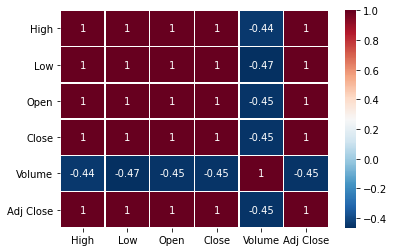

In [15]:
# Correlatio heatmap
#
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [16]:
# 4. Visualize the Dependent variable with Independent Feature
# prepare dataset to work with 
tsla_df=df[["Date","High","Open","Low","Close"]]
tsla_df.head(10)


,Date,High,Open,Low,Close
0,2020-01-02,86.139999,84.900002,84.342003,86.052002
1,2020-01-03,90.800003,88.099998,87.384003,88.601997
2,2020-01-06,90.311996,88.094002,88.000000,90.307999
3,2020-01-07,94.325996,92.279999,90.671997,93.811996
4,2020-01-08,99.697998,94.739998,93.646004,98.428001
5,2020-01-09,99.760002,99.419998,94.573997,96.267998
6,2020-01-10,96.987999,96.358002,94.739998,95.629997
7,2020-01-13,105.125999,98.699997,98.400002,104.972000
8,2020-01-14,109.482002,108.851997,104.980003,107.584000
9,2020-01-15,107.568001,105.952003,103.358002,103.699997


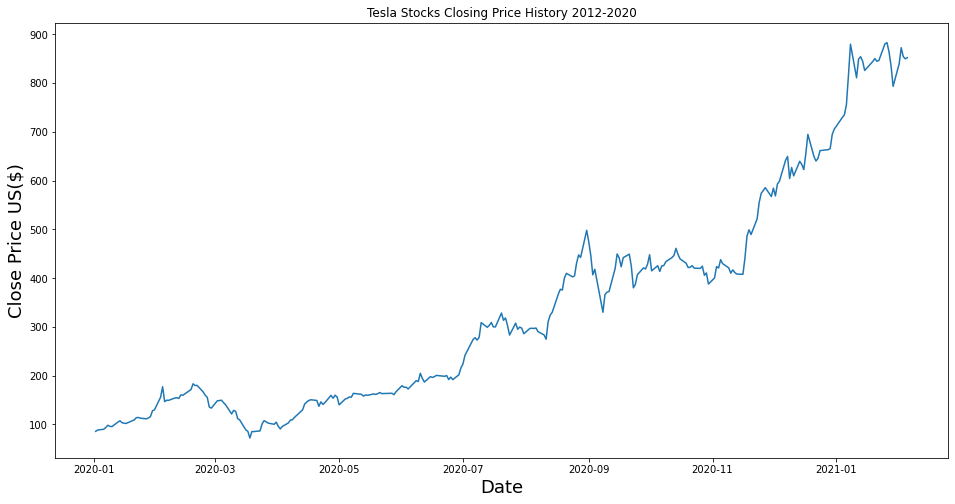

In [17]:
plt.figure(figsize=(16,8))
plt.title('Tesla Stocks Closing Price History 2012-2020')
plt.plot(tsla_df['Date'],tsla_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

In [18]:
# prepare dataset to work with 
tsla_df=df[["Date","High","Open","Low","Close"]]
tsla_df.head(10)


,Date,High,Open,Low,Close
0,2020-01-02,86.139999,84.900002,84.342003,86.052002
1,2020-01-03,90.800003,88.099998,87.384003,88.601997
2,2020-01-06,90.311996,88.094002,88.000000,90.307999
3,2020-01-07,94.325996,92.279999,90.671997,93.811996
4,2020-01-08,99.697998,94.739998,93.646004,98.428001
5,2020-01-09,99.760002,99.419998,94.573997,96.267998
6,2020-01-10,96.987999,96.358002,94.739998,95.629997
7,2020-01-13,105.125999,98.699997,98.400002,104.972000
8,2020-01-14,109.482002,108.851997,104.980003,107.584000
9,2020-01-15,107.568001,105.952003,103.358002,103.699997


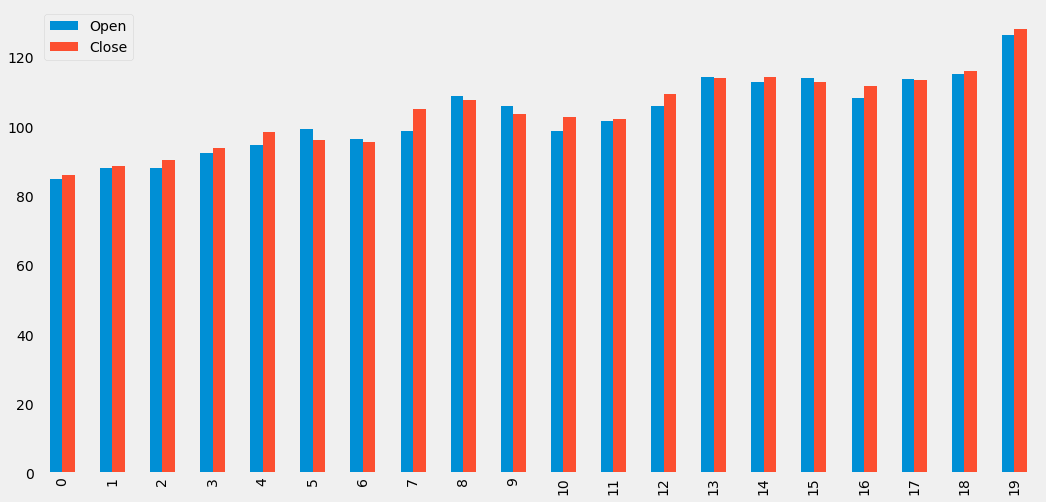

In [19]:
# Plot Open vs Close
tsla_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


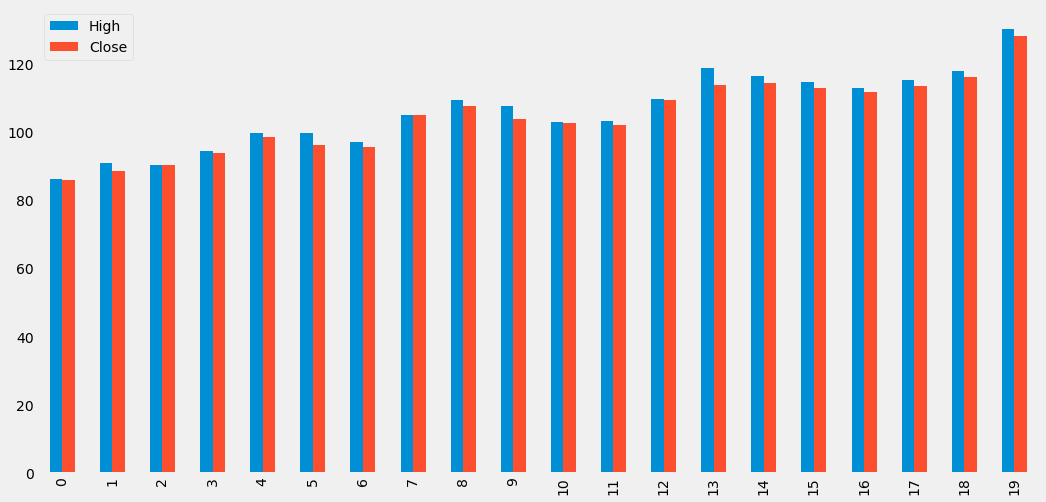

In [89]:
# Plot High vs Close
tsla_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


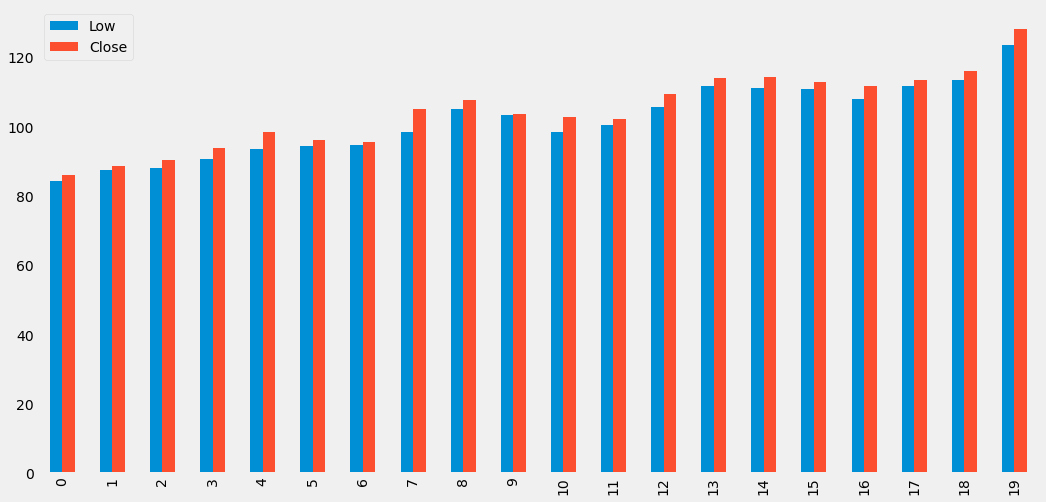

In [20]:
# Plot Low vs Close
df[['Low','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [21]:
# Date format is DateTime 
# it will throw error while training so I have created seperate month, year and date entities
tsla_df["Year"]= df["Date"].dt.year
tsla_df["Month"]= df["Date"].dt.month
tsla_df["Day"]= df["Date"].dt.day

<ipython-input-21-187d3400bef1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df["Year"]= df["Date"].dt.year


In [23]:
# separate Independent and dependent variable
X = tsla_df.iloc[:,tsla_df.columns !="Close"]
Y= tsla_df.iloc[:, 5]

In [24]:
print(X.shape) # output: (2671, 7)
print(Y.shape) # output: (2671,)



(277, 7)
(277,)


In [25]:
# prepare dataset to work with 
tsla_df=df[["High","Open","Low","Close"]]
tsla_df.tail(10)

,High,Open,Low,Close
267,900.400024,855.000000,838.820007,880.799988
268,895.900024,891.380005,871.599976,883.090027
269,891.500000,870.349976,858.659973,864.159973
270,848.000000,820.000000,801.000000,835.429993
271,842.409973,830.000000,780.099976,793.530029
272,842.000000,814.289978,795.559998,839.809998
273,880.500000,844.679993,842.200012,872.789978
274,878.080017,877.020020,853.059998,854.690002
275,856.500000,855.000000,833.419983,849.989990
276,864.770020,845.000000,838.969971,852.229980


In [26]:
# separate Independent and dependent variable
x = tsla_df.iloc[:,tsla_df.columns !="Close"]
y= tsla_df.iloc[:, 3]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.15)


In [28]:
print(x_train.shape) # output: (2003, 7)
print(x_test.shape)  # output: (668, 7)
print(y_train.shape) # output: (2003,)
print(y_test.shape)  # output: (668,)
# y_test to be evaluated with y_pred for Diff models

(235, 3)
(42, 3)
(235,)
(42,)


# 1. Linear Regression Model Training and Testing

In [29]:
# Linear Regression Model Training and Testing
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)


In [30]:
# Linear Model Cross-Validation
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)


Accuracy:  92.83262113358332


In [ ]:
# Plot Actual vs Predicted Value

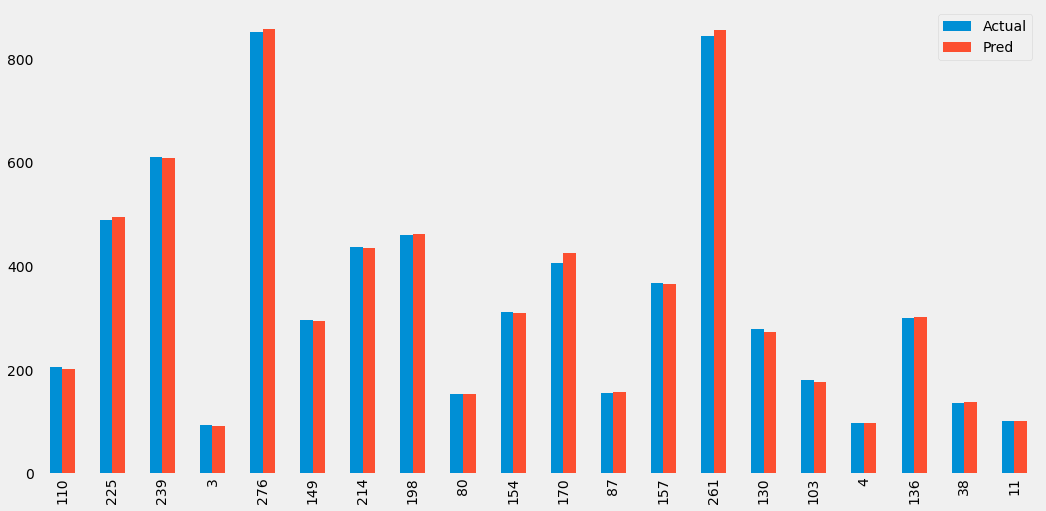

In [31]:
plot_df=pd.DataFrame({"Actual":y_test,"Pred":y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


# 2. KNN Model Training and Testing

In [32]:
# KNN Model Training and Testing
# from pandas.tseries import converter
# converter.register()

from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)


In [33]:
# KNN Cross-Validation
# knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
knn_kfold = model_selection.KFold(n_splits=20, random_state=None)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype("int"), cv=knn_kfold)
print("Accuracy:", results_kfold.mean()*100)


Accuracy: -579.771133849358


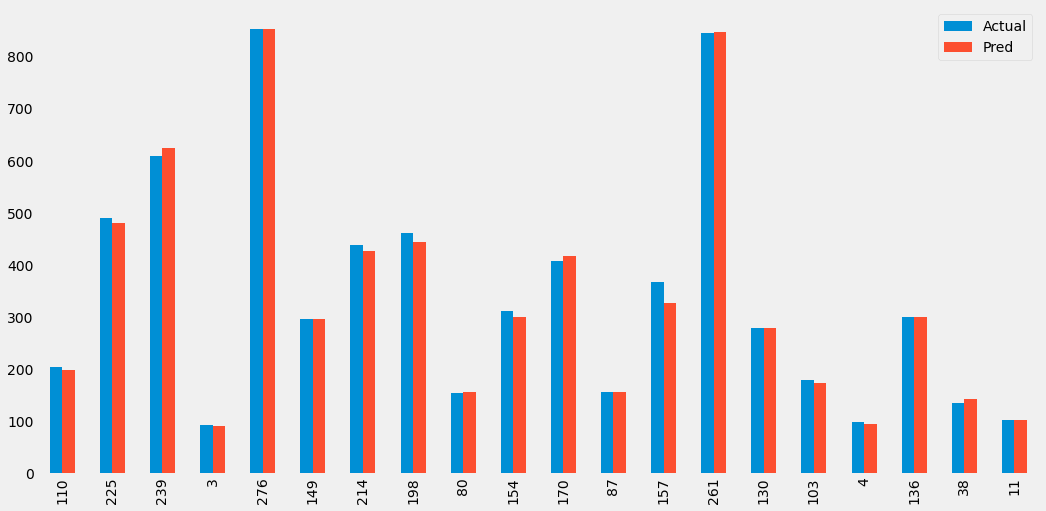

In [34]:
# Plot Actual vs Predicted
plot_knn_df=pd.DataFrame({"Actual":y_test,"Pred":y_knn_pred})
plot_knn_df.head(20).plot(kind="bar",figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()
         

# 3. SVM (Support Vector Machine) Model Training and Testing

In [36]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel="linear")
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

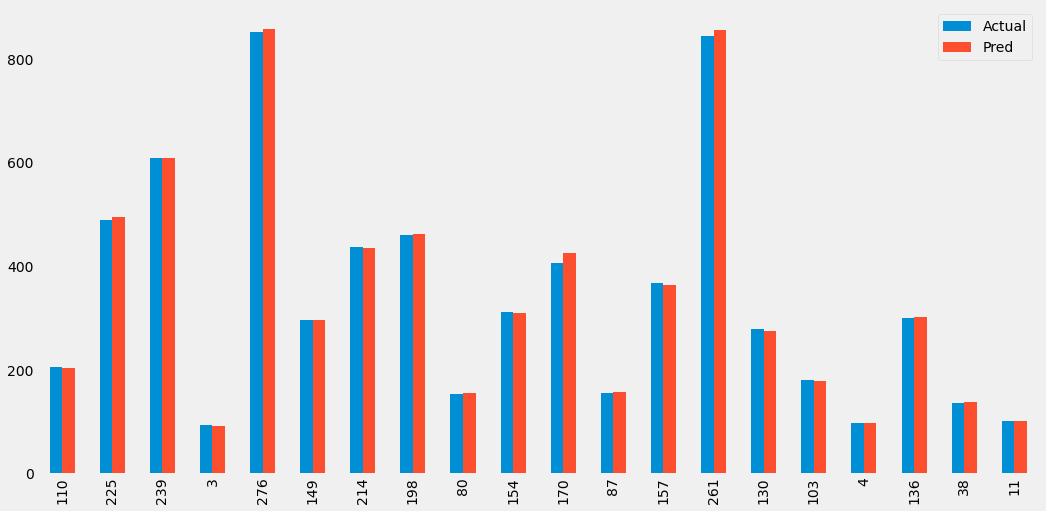

In [37]:
# Plot Actual vs Predicted
plot_svm_df=pd.DataFrame({"Actual":y_test,"Pred":y_svm_pred})
plot_svm_df.head(20).plot(kind="bar",figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()
    


# RMSE (Root Mean Square Error)

In [38]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [39]:
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print("Linear Model Root Mean Square Error",lr_mse)


Linear Model Root Mean Square Error 6.202588134874415


In [40]:
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print("KNN Model Root Mean Square Error",knn_mse)


KNN Model Root Mean Square Error 9.644821419079896


In [42]:
svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print("SVM Model Root Mean Square Error SVM",svm_mse)

SVM Model Root Mean Square Error SVM 6.557998371907126


# R2 or r-squared error
# Mathematical Formula for r2 score :(y_test[i] — y_pred[i]) **2

In [43]:
print("Linear R2: ", r2_score(y_test, y_pred))
print("KNN R2: ", r2_score(y_test, y_knn_pred))
print("SVM R2: ", r2_score(y_test, y_svm_pred))

Linear R2:  0.9991380399076849
KNN R2:  0.9979158467378687
SVM R2:  0.9990364286469727
